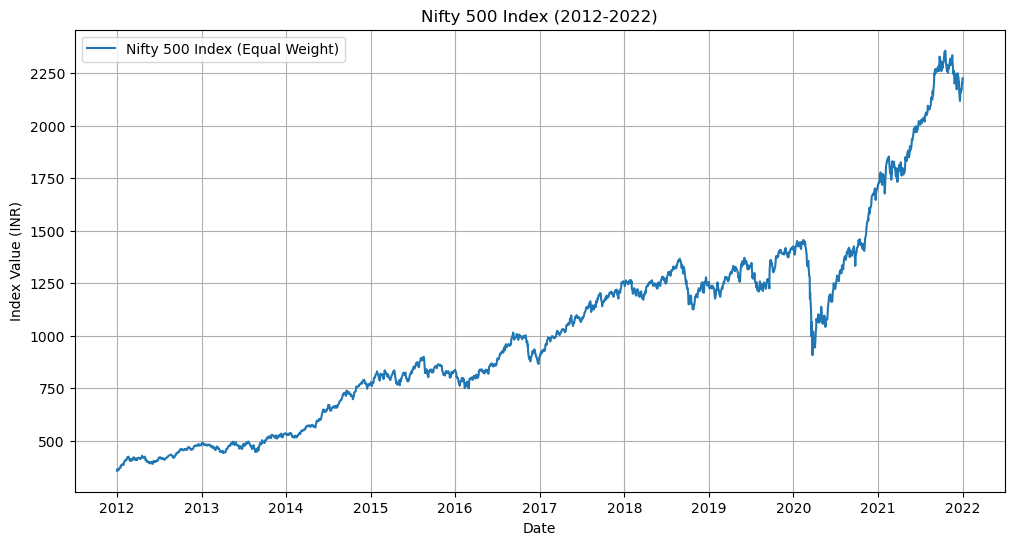

In [13]:


import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory containing all 500 companies' CSV files
data_dir = r'C:\Users\USER\Desktop\github\NIFTY500_dataset\Nifty 50 companies'

# List of all CSV files in the directory
files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Initialize an empty DataFrame to store closing prices
closing_prices = pd.DataFrame()

# Loop through each file to get the closing prices
for file in files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Check if 'Close' column exists
    if 'Close' in df.columns:
        # Keep only the 'Close' column and rename it to the company name (from the filename)
        df_close = df[['Close']].rename(columns={'Close': file.split('.')[0]})
        closing_prices = pd.concat([closing_prices, df_close], axis=1, join='outer')
    else:
        print(f"'Close' not found in {file}")

# Fill missing data to avoid dropping too many rows
closing_prices.fillna(method='ffill', inplace=True)
closing_prices.fillna(method='bfill', inplace=True)

# Calculate the equal-weighted index
# For each day, take the average of closing prices
nifty500_index = closing_prices.mean(axis=1)

# Plot the Nifty 500 index
plt.figure(figsize=(12, 6))
plt.plot(nifty500_index, label='Nifty 500 Index (Equal Weight)')
plt.title('Nifty 500 Index (2012-2022)')
plt.xlabel('Date')
plt.ylabel('Index Value (INR)')
plt.legend()
plt.grid(True)
plt.show()

